In [6]:
import time
import warnings
from itertools import cycle, islice

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("Clustering.xlsx",sheet_name="bps 2022")
display(df.head(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Provinsi             35 non-null     object 
 1   Migas                35 non-null     float64
 2   Industri Pengolahan  35 non-null     float64
 3   Pertanian            35 non-null     float64
 4   Pertambangan         35 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.5+ KB


,Provinsi,Migas,Industri Pengolahan,Pertanian,Pertambangan
0,Aceh,0.0,163.1,104.0,478.7
1,North Sumatra,1.1,12135.9,579.9,0.0
2,South Sumatra,436.0,3706.2,59.5,3381.6
3,West Sumatra,0.0,2756.6,100.4,11.4
4,Bengkulu,0.0,44.0,5.4,261.8


None

In [3]:
df.set_index('Provinsi', drop = True, inplace = True)
df

,Migas,Industri Pengolahan,Pertanian,Pertambangan
Provinsi,,,,
Aceh,0.0,163.1,104.0,478.7
North Sumatra,1.1,12135.9,579.9,0.0
South Sumatra,436.0,3706.2,59.5,3381.6
West Sumatra,0.0,2756.6,100.4,11.4
Bengkulu,0.0,44.0,5.4,261.8
Riau,1528.5,20736.4,260.9,70.1
Riau Islands,2826.1,15204.5,122.0,64.1
Jambi,1450.6,853.2,252.2,445.9
Lampung,0.0,3699.4,648.6,1253.1


In [4]:
# Menghapus baris terakhir
df = df.iloc[:-1]

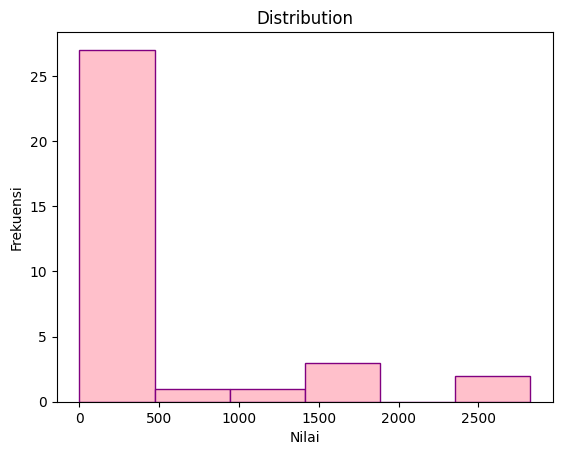

In [5]:
#HISTOGRAM

#Menentukan jumlah bins
def sturges_rule(data):
    """
    Menggunakan aturan Sturges untuk menentukan jumlah bins pada histogram.

    Parameters:
    data (array_like): Data yang akan digunakan untuk membuat histogram.

    Returns:
    int: Jumlah bins yang direkomendasikan.
    """
    sample_size = len(data)
    num_bins = int(np.log2(sample_size) + 1)
    return num_bins

num_bins_sturges = sturges_rule(df['Migas'])

# Import library yang digunakan
import matplotlib.pyplot as plt

# Membuat histogram untuk melihat sebaran pendapatan tim
plt.hist(df['Migas'], bins=num_bins_sturges, color='pink', edgecolor='purple')

# Menambahkan judul plot dan nama untuk sumbu x dan y
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.title('Distribution')

# Menampilkan histogram
plt.show()

In [7]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = scaler.get_feature_names_out(), index = df.index)
df_scaled

,Migas,Industri Pengolahan,Pertanian,Pertambangan
Provinsi,,,,
Aceh,-0.500642,-0.675134,-0.189319,-0.191452
North Sumatra,-0.499202,0.730021,1.923153,-0.377554
South Sumatra,0.070279,-0.259308,-0.386850,0.937094
West Sumatra,-0.500642,-0.370755,-0.205299,-0.373122
Bengkulu,-0.500642,-0.689112,-0.626994,-0.275775
Riau,1.500856,1.739396,0.507144,-0.350301
Riau Islands,3.200002,1.090159,-0.109419,-0.352634
Jambi,1.398850,-0.594143,0.468526,-0.204203
Lampung,-0.500642,-0.260106,2.228105,0.109608


### K Means

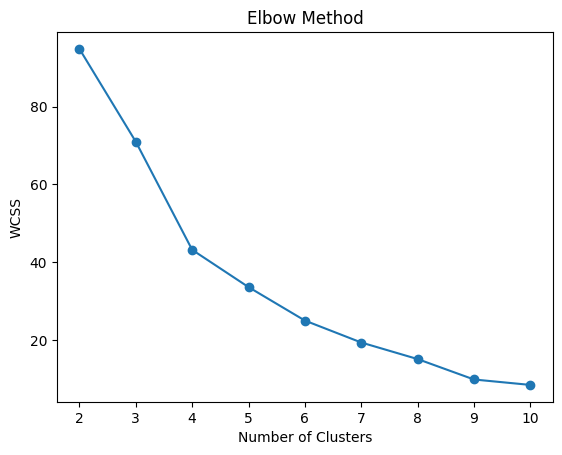

In [47]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

# Specify the range of cluster numbers to try
num_clusters_range = range(2, 11)

# Perform K-Means clustering for different numbers of clusters
for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=26)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(num_clusters_range, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

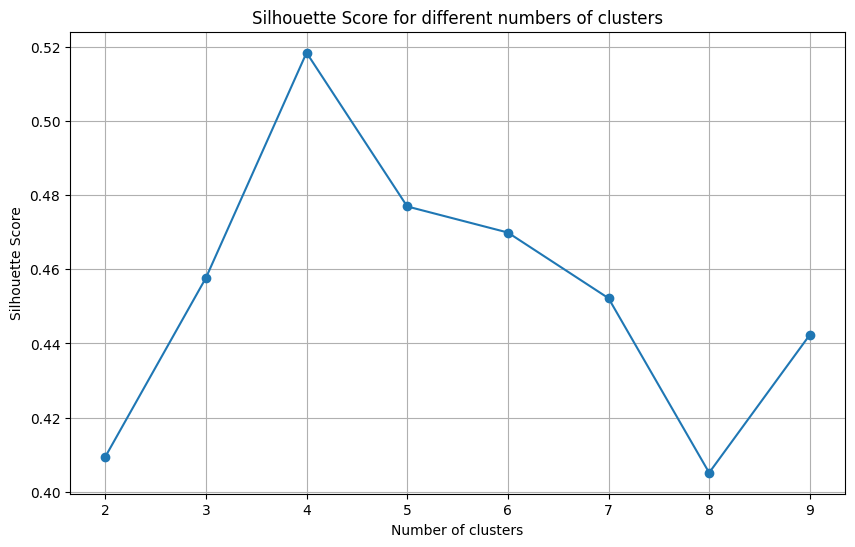

In [48]:
silhouette_scores = []
cluster_range = range(2, 10)  # Ubah range ini sesuai kebutuhan Anda

for n_clusters in cluster_range:
    km_cluster = KMeans(n_clusters = n_clusters, random_state = 26)
    cluster_labels = km_cluster.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# 4. Plot Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for different numbers of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [49]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
# 3. Perform Spectral Clustering
n_clusters = 4  # Misalkan kita ingin 4 cluster
kmeans_cluster = KMeans(n_clusters = 4, random_state = 26)
cluster_labels = kmeans_cluster.fit_predict(df_scaled)

# 4. Calculate Evaluation Metrics
silhouette_avg = silhouette_score(df_scaled, cluster_labels)
davies_bouldin_avg = davies_bouldin_score(df_scaled, cluster_labels)
calinski_harabasz_avg = calinski_harabasz_score(df_scaled, cluster_labels)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')
print(f'Calinski-Harabasz Index: {calinski_harabasz_avg}')

# 5. Add cluster labels to the original DataFrame (optional)
df['Cluster'] = cluster_labels
df

Silhouette Score: 0.5183266402674497
Davies-Bouldin Index: 0.7971074999206053
Calinski-Harabasz Index: 21.509820181778064


,Migas,Industri Pengolahan,Pertanian,Pertambangan,Cluster
Provinsi,,,,,
Aceh,0.0,163.1,104.0,478.7,0
North Sumatra,1.1,12135.9,579.9,0.0,1
South Sumatra,436.0,3706.2,59.5,3381.6,0
West Sumatra,0.0,2756.6,100.4,11.4,0
Bengkulu,0.0,44.0,5.4,261.8,0
Riau,1528.5,20736.4,260.9,70.1,2
Riau Islands,2826.1,15204.5,122.0,64.1,2
Jambi,1450.6,853.2,252.2,445.9,2
Lampung,0.0,3699.4,648.6,1253.1,1


In [51]:
df_scaled

,Migas,Industri Pengolahan,Pertanian,Pertambangan
Provinsi,,,,
Aceh,-0.500642,-0.675134,-0.189319,-0.191452
North Sumatra,-0.499202,0.730021,1.923153,-0.377554
South Sumatra,0.070279,-0.259308,-0.386850,0.937094
West Sumatra,-0.500642,-0.370755,-0.205299,-0.373122
Bengkulu,-0.500642,-0.689112,-0.626994,-0.275775
Riau,1.500856,1.739396,0.507144,-0.350301
Riau Islands,3.200002,1.090159,-0.109419,-0.352634
Jambi,1.398850,-0.594143,0.468526,-0.204203
Lampung,-0.500642,-0.260106,2.228105,0.109608


### K-medoid

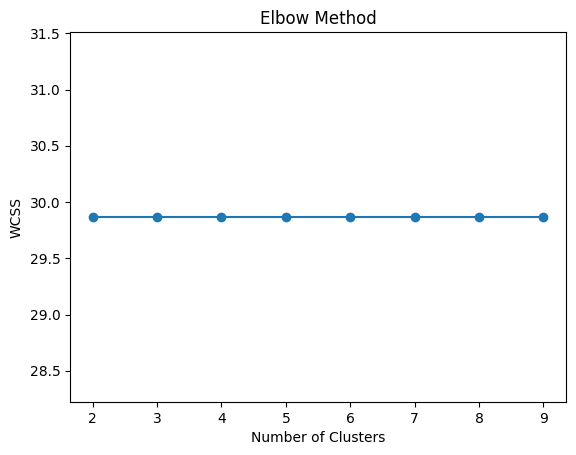

In [52]:
from sklearn_extra.cluster import KMedoids
wcss = []

# Specify the range of cluster numbers to try
num_clusters_range = range(2, 10)

# Perform K-Means clustering for different numbers of clusters
for num_clusters in num_clusters_range:
    kmedoid = KMedoids(n_clusters=n_clusters, random_state=26)
    kmedoid.fit(df_scaled)
    wcss.append(kmedoid.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(num_clusters_range, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

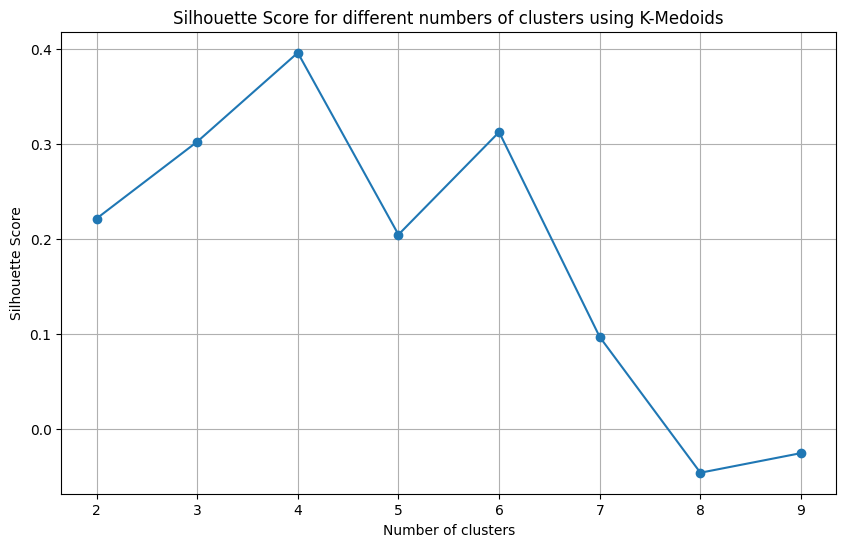

In [53]:

silhouette_scores = []
cluster_range = range(2, 10)  # Ubah range ini sesuai kebutuhan Anda

for n_clusters in cluster_range:
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=26)
    cluster_labels = kmedoids.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for different numbers of clusters using K-Medoids')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [54]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
# 3. Perform Spectral Clustering
kmedoid_cluster = KMedoids(n_clusters=4, random_state=26)
cluster_labels = kmedoid_cluster.fit_predict(df_scaled)

# 4. Calculate Evaluation Metrics
silhouette_avg = silhouette_score(df_scaled, cluster_labels)
davies_bouldin_avg = davies_bouldin_score(df_scaled, cluster_labels)
calinski_harabasz_avg = calinski_harabasz_score(df_scaled, cluster_labels)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')
print(f'Calinski-Harabasz Index: {calinski_harabasz_avg}')

# 5. Add cluster labels to the original DataFrame (optional)
df['Cluster'] = cluster_labels
df

Silhouette Score: 0.3957124099939481
Davies-Bouldin Index: 0.9504407133592956
Calinski-Harabasz Index: 14.815541695845733


,Migas,Industri Pengolahan,Pertanian,Pertambangan,Cluster
Provinsi,,,,,
Aceh,0.0,163.1,104.0,478.7,3
North Sumatra,1.1,12135.9,579.9,0.0,2
South Sumatra,436.0,3706.2,59.5,3381.6,0
West Sumatra,0.0,2756.6,100.4,11.4,3
Bengkulu,0.0,44.0,5.4,261.8,3
Riau,1528.5,20736.4,260.9,70.1,1
Riau Islands,2826.1,15204.5,122.0,64.1,1
Jambi,1450.6,853.2,252.2,445.9,3
Lampung,0.0,3699.4,648.6,1253.1,2


In [55]:
df_scaled

,Migas,Industri Pengolahan,Pertanian,Pertambangan
Provinsi,,,,
Aceh,-0.500642,-0.675134,-0.189319,-0.191452
North Sumatra,-0.499202,0.730021,1.923153,-0.377554
South Sumatra,0.070279,-0.259308,-0.386850,0.937094
West Sumatra,-0.500642,-0.370755,-0.205299,-0.373122
Bengkulu,-0.500642,-0.689112,-0.626994,-0.275775
Riau,1.500856,1.739396,0.507144,-0.350301
Riau Islands,3.200002,1.090159,-0.109419,-0.352634
Jambi,1.398850,-0.594143,0.468526,-0.204203
Lampung,-0.500642,-0.260106,2.228105,0.109608


### Gaussian Mixture Models

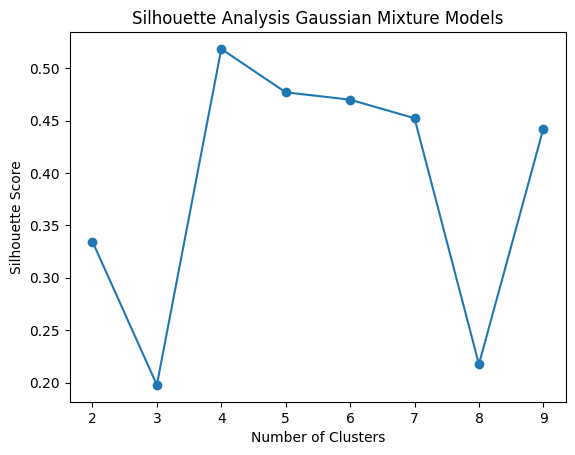

In [8]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Assuming df_scaled is your scaled data

cluster_range = range(2, 10)  # Adjust this range as needed
silhouette_avgs = []

for n_clusters in cluster_range:
    gmm_cluster = GaussianMixture(n_components=n_clusters, random_state=26)
    cluster_labels = gmm_cluster.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# Plot the silhouette scores against the number of clusters
plt.plot(cluster_range, silhouette_avgs, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis Gaussian Mixture Models')
plt.show()


In [9]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
# 3. Perform Spectral Clustering
n_clusters = 4  # Misalkan kita ingin 4 cluster
gmm_cluster = GaussianMixture(n_components=4, random_state=26)
cluster_labels = gmm_cluster.fit_predict(df_scaled)

# 4. Calculate Evaluation Metrics
silhouette_avg = silhouette_score(df_scaled, cluster_labels)
davies_bouldin_avg = davies_bouldin_score(df_scaled, cluster_labels)
calinski_harabasz_avg = calinski_harabasz_score(df_scaled, cluster_labels)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')
print(f'Calinski-Harabasz Index: {calinski_harabasz_avg}')

# 5. Add cluster labels to the original DataFrame (optional)
df['Cluster'] = cluster_labels
df

Silhouette Score: 0.5183266402674497
Davies-Bouldin Index: 0.7971074999206053
Calinski-Harabasz Index: 21.509820181778064


,Migas,Industri Pengolahan,Pertanian,Pertambangan,Cluster
Provinsi,,,,,
Aceh,0.0,163.1,104.0,478.7,0
North Sumatra,1.1,12135.9,579.9,0.0,1
South Sumatra,436.0,3706.2,59.5,3381.6,0
West Sumatra,0.0,2756.6,100.4,11.4,0
Bengkulu,0.0,44.0,5.4,261.8,0
Riau,1528.5,20736.4,260.9,70.1,2
Riau Islands,2826.1,15204.5,122.0,64.1,2
Jambi,1450.6,853.2,252.2,445.9,2
Lampung,0.0,3699.4,648.6,1253.1,1


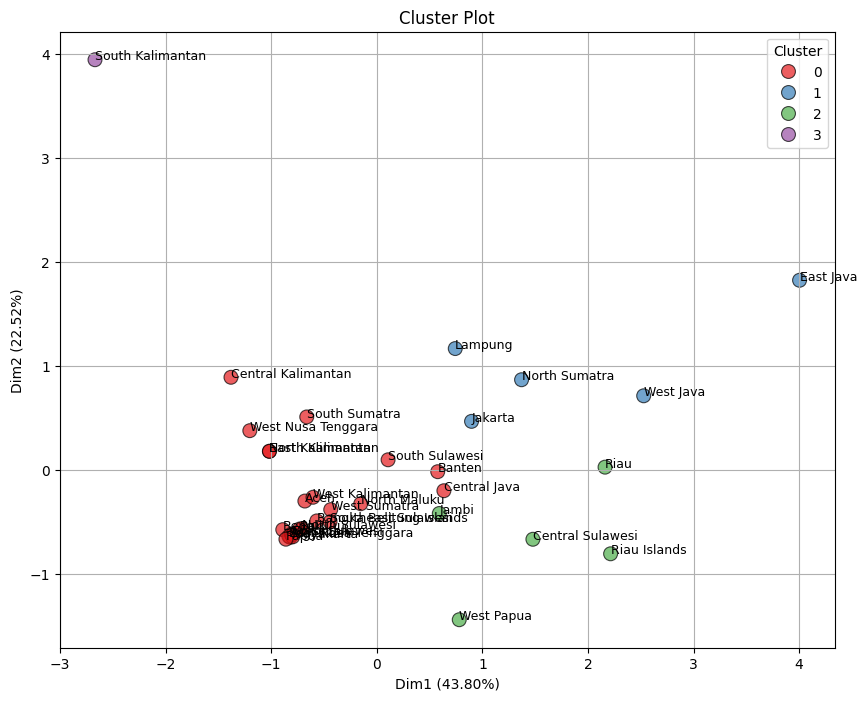

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Misalkan df_scaled adalah DataFrame yang sudah dinormalisasi dan cluster_labels adalah hasil klasterisasi

# 1. Lakukan PCA untuk mereduksi data menjadi 2 dimensi
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# 2. Buat DataFrame untuk hasil PCA
df_pca = pd.DataFrame(data=pca_result, columns=['Dim1', 'Dim2'])
df_pca['Cluster'] = cluster_labels

# 3. Plot hasil klasterisasi
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='Dim1', y='Dim2', hue='Cluster', palette='Set1', s=100, alpha=0.7, edgecolor='k')

# Tambahkan label untuk setiap titik
for i, row in df_pca.iterrows():
    plt.text(row['Dim1'], row['Dim2'], df.index[i], fontsize=9)

plt.title('Cluster Plot')
plt.xlabel(f'Dim1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Dim2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [58]:
df_scaled

,Migas,Industri Pengolahan,Pertanian,Pertambangan
Provinsi,,,,
Aceh,-0.500642,-0.675134,-0.189319,-0.191452
North Sumatra,-0.499202,0.730021,1.923153,-0.377554
South Sumatra,0.070279,-0.259308,-0.386850,0.937094
West Sumatra,-0.500642,-0.370755,-0.205299,-0.373122
Bengkulu,-0.500642,-0.689112,-0.626994,-0.275775
Riau,1.500856,1.739396,0.507144,-0.350301
Riau Islands,3.200002,1.090159,-0.109419,-0.352634
Jambi,1.398850,-0.594143,0.468526,-0.204203
Lampung,-0.500642,-0.260106,2.228105,0.109608


### Fuzzy C-Means

In [22]:
!pip install fcmeans

ERROR: Could not find a version that satisfies the requirement fcmeans (from versions: none)
ERROR: No matching distribution found for fcmeans

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
df_fcm = df_scaled.copy()
df_fcm.head()

,Migas,Industri Pengolahan,Pertanian,Pertambangan
Provinsi,,,,
Aceh,-0.500642,-0.675134,-0.189319,-0.191452
North Sumatra,-0.499202,0.730021,1.923153,-0.377554
South Sumatra,0.070279,-0.259308,-0.386850,0.937094
West Sumatra,-0.500642,-0.370755,-0.205299,-0.373122
Bengkulu,-0.500642,-0.689112,-0.626994,-0.275775


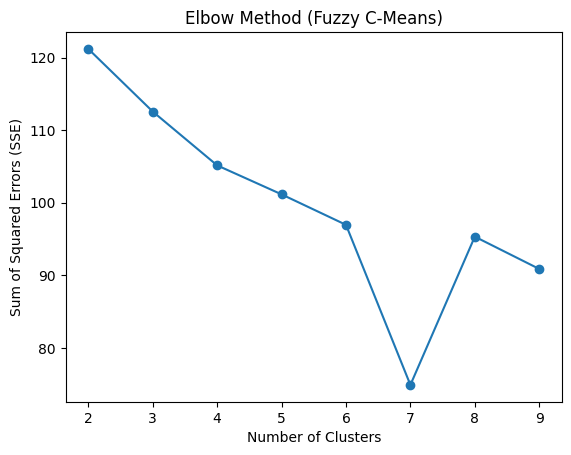

In [59]:
import matplotlib.pyplot as plt
from fcmeans import FCM
import numpy as np

def calculate_sse(data, centers, membership):
    # Calculate the sum of squared errors
    sse = 0.0
    for i in range(data.shape[0]):
        for j in range(centers.shape[0]):
            sse += membership[i, j] * np.sum((data[i] - centers[j]) ** 2)
    return sse

# Assuming df_scaled is your scaled data
df_scaled_array = df_scaled.to_numpy() if hasattr(df_scaled, 'to_numpy') else df_scaled

sse_values = []

# Specify the range of cluster numbers to try
num_clusters_range = range(2, 10)

# Perform Fuzzy C-Means clustering for different numbers of clusters
for num_clusters in num_clusters_range:
    fcm = FCM(n_clusters=num_clusters, random_state=42)
    fcm.fit(df_scaled_array)
    sse = calculate_sse(df_scaled_array, fcm.centers, fcm.u)
    sse_values.append(sse)

# Plot the SSE values against the number of clusters
plt.plot(num_clusters_range, sse_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method (Fuzzy C-Means)')
plt.show()

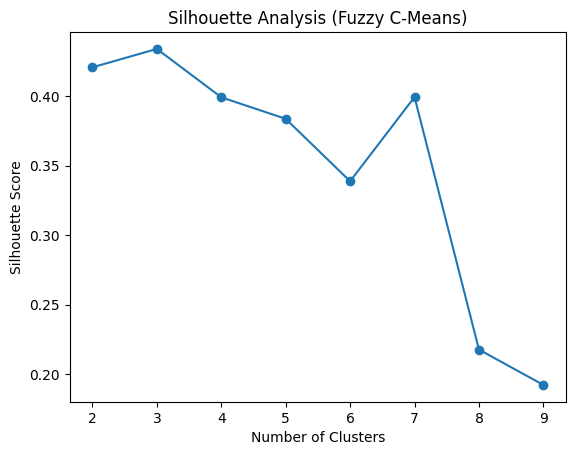

In [60]:
import matplotlib.pyplot as plt
from fcmeans import FCM
from sklearn.metrics import silhouette_score
import numpy as np

# Assuming df_scaled is your scaled data

# Convert df_scaled to a NumPy array if it is a DataFrame
df_scaled_array = df_scaled.to_numpy() if hasattr(df_scaled, 'to_numpy') else df_scaled

cluster_range = range(2, 10)  # Adjust this range as needed
silhouette_avgs = []

for n_clusters in cluster_range:
    fcm = FCM(n_clusters=n_clusters, random_state=42)
    fcm.fit(df_scaled_array)
    cluster_labels = fcm.u.argmax(axis=1)  # Get the cluster labels
    silhouette_avg = silhouette_score(df_scaled_array, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# Plot the silhouette scores against the number of clusters
plt.plot(cluster_range, silhouette_avgs, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis (Fuzzy C-Means)')
plt.show()


Silhouette Score: 0.43396316733924034
Davies-Bouldin Index: 1.064663974245341
Calinski-Harabasz Index: 13.095228716378285


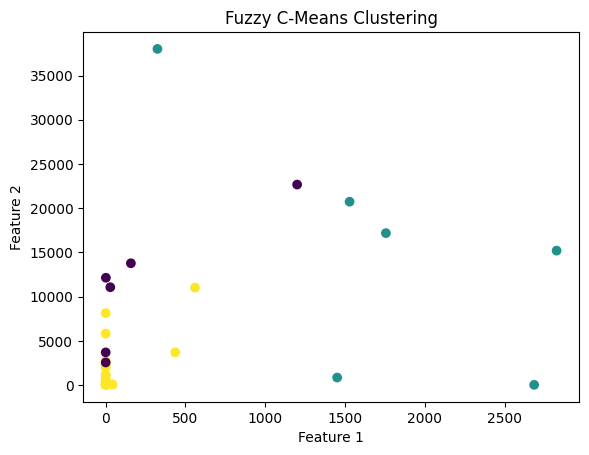

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from fcmeans import FCM
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Assuming df_scaled is your scaled data
# Convert df_scaled to a NumPy array if it is a DataFrame
df_scaled_array = df_scaled.to_numpy() if hasattr(df_scaled, 'to_numpy') else df_scaled

# 3. Perform Fuzzy C-Means Clustering
n_clusters = 3  # Number of clusters
fcm = FCM(n_clusters=n_clusters, random_state=42)
fcm.fit(df_scaled_array)
cluster_labels = fcm.u.argmax(axis=1)  # Get the cluster labels

# 4. Calculate Evaluation Metrics
silhouette_avg = silhouette_score(df_scaled_array, cluster_labels)
davies_bouldin_avg = davies_bouldin_score(df_scaled_array, cluster_labels)
calinski_harabasz_avg = calinski_harabasz_score(df_scaled_array, cluster_labels)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')
print(f'Calinski-Harabasz Index: {calinski_harabasz_avg}')

# 5. Add cluster labels to the original DataFrame (optional)
df['Cluster'] = cluster_labels

# (Optional) If you want to plot the results:
# Assuming df has the original unscaled data for plotting
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Fuzzy C-Means Clustering')
plt.show()

In [62]:
df_scaled

,Migas,Industri Pengolahan,Pertanian,Pertambangan
Provinsi,,,,
Aceh,-0.500642,-0.675134,-0.189319,-0.191452
North Sumatra,-0.499202,0.730021,1.923153,-0.377554
South Sumatra,0.070279,-0.259308,-0.386850,0.937094
West Sumatra,-0.500642,-0.370755,-0.205299,-0.373122
Bengkulu,-0.500642,-0.689112,-0.626994,-0.275775
Riau,1.500856,1.739396,0.507144,-0.350301
Riau Islands,3.200002,1.090159,-0.109419,-0.352634
Jambi,1.398850,-0.594143,0.468526,-0.204203
Lampung,-0.500642,-0.260106,2.228105,0.109608


### Spectral

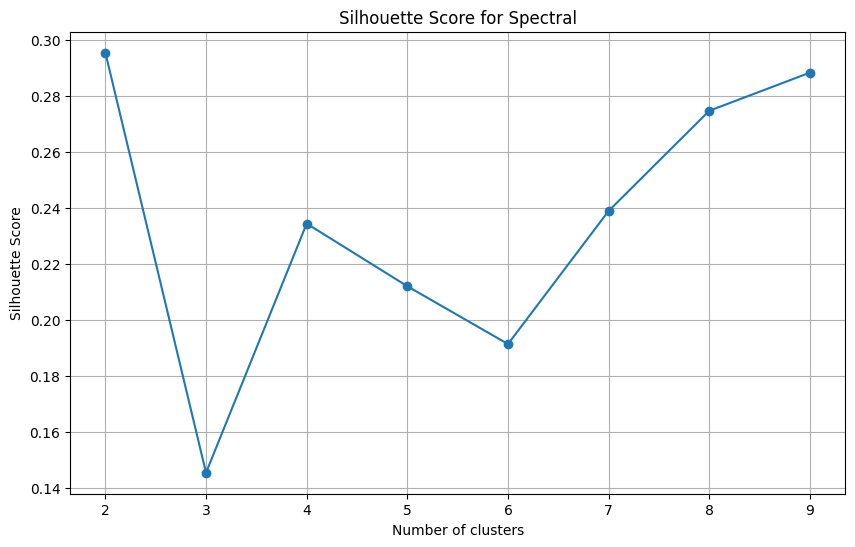

In [13]:
from sklearn.cluster import SpectralClustering
silhouette_scores = []
cluster_range = range(2, 10)  # Ubah range ini sesuai kebutuhan Anda

for n_clusters in cluster_range:
    spc_cluster = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=26)
    cluster_labels = spc_cluster.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# 4. Plot Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Spectral')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
# 3. Perform Spectral Clustering
n_clusters = 2  # Misalkan kita ingin 4 cluster
spectral_cluster = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=26)
cluster_labels = spectral_cluster.fit_predict(df_scaled)

# 4. Calculate Evaluation Metrics
silhouette_avg = silhouette_score(df_scaled, cluster_labels)
davies_bouldin_avg = davies_bouldin_score(df_scaled, cluster_labels)
calinski_harabasz_avg = calinski_harabasz_score(df_scaled, cluster_labels)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')
print(f'Calinski-Harabasz Index: {calinski_harabasz_avg}')

# 5. Add cluster labels to the original DataFrame (optional)
df['Cluster'] = cluster_labels
df


Silhouette Score: 0.29534819467015194
Davies-Bouldin Index: 1.3853570329816982
Calinski-Harabasz Index: 10.856364898877729


,Migas,Industri Pengolahan,Pertanian,Pertambangan,Cluster
Provinsi,,,,,
Aceh,0.0,163.1,104.0,478.7,0
North Sumatra,1.1,12135.9,579.9,0.0,1
South Sumatra,436.0,3706.2,59.5,3381.6,0
West Sumatra,0.0,2756.6,100.4,11.4,1
Bengkulu,0.0,44.0,5.4,261.8,0
Riau,1528.5,20736.4,260.9,70.1,1
Riau Islands,2826.1,15204.5,122.0,64.1,1
Jambi,1450.6,853.2,252.2,445.9,1
Lampung,0.0,3699.4,648.6,1253.1,1


In [65]:
df_scaled

,Migas,Industri Pengolahan,Pertanian,Pertambangan
Provinsi,,,,
Aceh,-0.500642,-0.675134,-0.189319,-0.191452
North Sumatra,-0.499202,0.730021,1.923153,-0.377554
South Sumatra,0.070279,-0.259308,-0.386850,0.937094
West Sumatra,-0.500642,-0.370755,-0.205299,-0.373122
Bengkulu,-0.500642,-0.689112,-0.626994,-0.275775
Riau,1.500856,1.739396,0.507144,-0.350301
Riau Islands,3.200002,1.090159,-0.109419,-0.352634
Jambi,1.398850,-0.594143,0.468526,-0.204203
Lampung,-0.500642,-0.260106,2.228105,0.109608


### Agglomerative

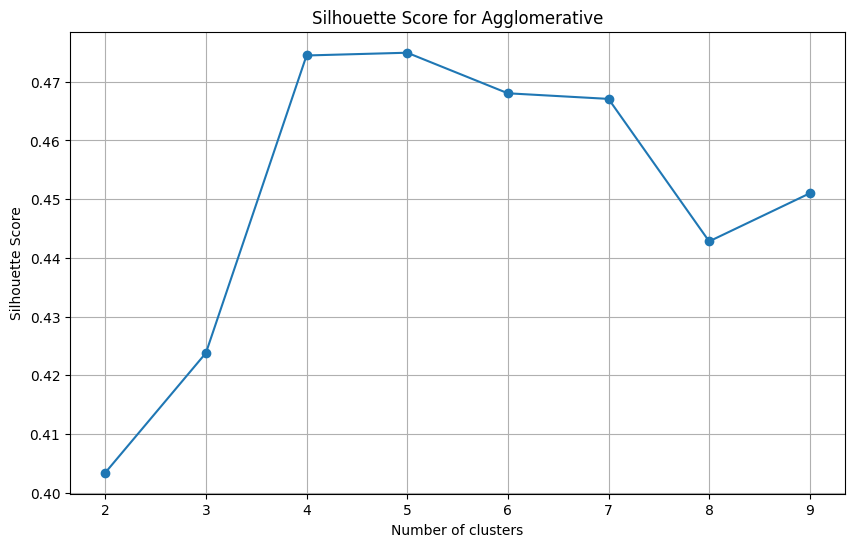

In [14]:
from sklearn.cluster import AgglomerativeClustering
silhouette_scores = []
cluster_range = range(2, 10)  # Ubah range ini sesuai kebutuhan Anda

for n_clusters in cluster_range:
    agg_cluster = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = agg_cluster.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# 4. Plot Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Agglomerative')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [67]:


# 3. Perform Agglomerative Clustering
n_clusters = 5  # Misalkan kita ingin 4 cluster
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = agg_cluster.fit_predict(df_scaled)

# 4. Calculate Evaluation Metrics
silhouette_avg = silhouette_score(df_scaled, cluster_labels)
davies_bouldin_avg = davies_bouldin_score(df_scaled, cluster_labels)
calinski_harabasz_avg = calinski_harabasz_score(df_scaled, cluster_labels)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')
print(f'Calinski-Harabasz Index: {calinski_harabasz_avg}')

# 5. Add cluster labels to the original DataFrame (optional)
df['Cluster'] = cluster_labels
df

Silhouette Score: 0.4749438714548114
Davies-Bouldin Index: 0.7219507903633587
Calinski-Harabasz Index: 19.720734350867975


,Migas,Industri Pengolahan,Pertanian,Pertambangan,Cluster
Provinsi,,,,,
Aceh,0.0,163.1,104.0,478.7,3
North Sumatra,1.1,12135.9,579.9,0.0,0
South Sumatra,436.0,3706.2,59.5,3381.6,3
West Sumatra,0.0,2756.6,100.4,11.4,3
Bengkulu,0.0,44.0,5.4,261.8,3
Riau,1528.5,20736.4,260.9,70.1,1
Riau Islands,2826.1,15204.5,122.0,64.1,1
Jambi,1450.6,853.2,252.2,445.9,1
Lampung,0.0,3699.4,648.6,1253.1,0


In [68]:
df_scaled

,Migas,Industri Pengolahan,Pertanian,Pertambangan
Provinsi,,,,
Aceh,-0.500642,-0.675134,-0.189319,-0.191452
North Sumatra,-0.499202,0.730021,1.923153,-0.377554
South Sumatra,0.070279,-0.259308,-0.386850,0.937094
West Sumatra,-0.500642,-0.370755,-0.205299,-0.373122
Bengkulu,-0.500642,-0.689112,-0.626994,-0.275775
Riau,1.500856,1.739396,0.507144,-0.350301
Riau Islands,3.200002,1.090159,-0.109419,-0.352634
Jambi,1.398850,-0.594143,0.468526,-0.204203
Lampung,-0.500642,-0.260106,2.228105,0.109608


### Optics

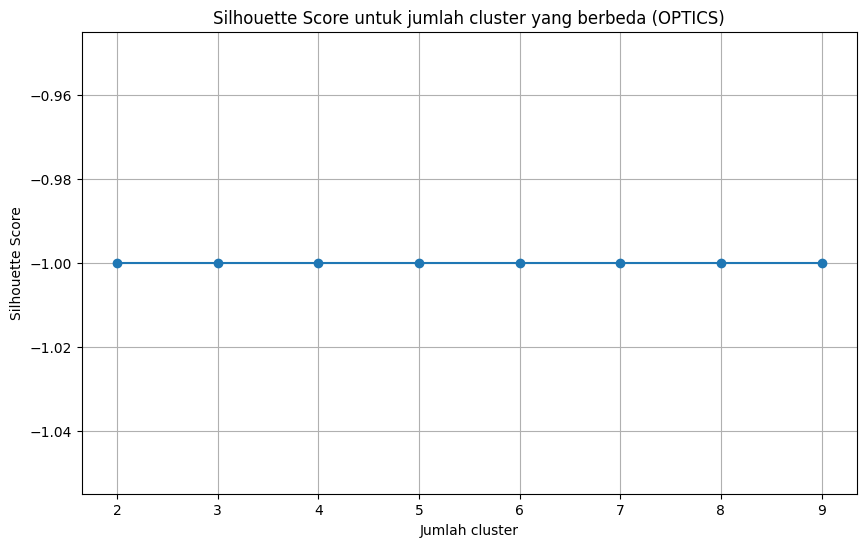

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score
import numpy as np

# Asumsikan df_scaled adalah data yang telah diskalakan
df_scaled_array = df_scaled.to_numpy() if hasattr(df_scaled, 'to_numpy') else df_scaled

silhouette_scores = []
cluster_range = range(2, 10)  # Sesuaikan range ini sesuai kebutuhan Anda

# Melakukan clustering OPTICS dan ekstraksi cluster untuk nilai xi yang berbeda
for n_clusters in cluster_range:
    optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=n_clusters)
    optics.fit(df_scaled_array)
    cluster_labels = optics.labels_
    
    # Filter titik-titik noise (-1)
    if len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0) > 1:
        silhouette_avg = silhouette_score(df_scaled_array, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(-1)

# Plot skor siluet terhadap jumlah cluster
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score untuk jumlah cluster yang berbeda (OPTICS)')
plt.xlabel('Jumlah cluster')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [9]:
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

# Data dummy, sesuaikan dengan data Anda sendiri
X = df_scaled

# Inisialisasi dan fit OPTICS
optics = OPTICS(min_samples=3, xi=0.05, min_cluster_size=0.1)
optics.fit(X)

# Dapatkan label kluster
labels = optics.labels_

# Jika semua poin dianggap noise oleh metode clustering, skip perhitungan metrik
if len(set(labels)) > 1 and len(set(labels)) < len(X):
    silhouette_avg = silhouette_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
else:
    silhouette_avg = -1
    calinski_harabasz = -1
    davies_bouldin = -1

# Print hasil evaluasi
print("OPTICS Clustering Metrics:")
print(f"  Silhouette Score: {silhouette_avg}")
print(f"  Calinski-Harabasz Index: {calinski_harabasz}")
print(f"  Davies-Bouldin Index: {davies_bouldin}")

# 5. Add cluster labels to the original DataFrame (optional)
df['Cluster'] = cluster_labels
df


OPTICS Clustering Metrics:
  Silhouette Score: 0.3539213512290603
  Calinski-Harabasz Index: 8.105874711855629
  Davies-Bouldin Index: 1.1577709144082344


,Migas,Industri Pengolahan,Pertanian,Pertambangan,Cluster
Provinsi,,,,,
Aceh,0.0,163.1,104.0,478.7,0
North Sumatra,1.1,12135.9,579.9,0.0,0
South Sumatra,436.0,3706.2,59.5,3381.6,0
West Sumatra,0.0,2756.6,100.4,11.4,0
Bengkulu,0.0,44.0,5.4,261.8,0
Riau,1528.5,20736.4,260.9,70.1,0
Riau Islands,2826.1,15204.5,122.0,64.1,0
Jambi,1450.6,853.2,252.2,445.9,0
Lampung,0.0,3699.4,648.6,1253.1,0


In [11]:
labels

array([ 0, -1,  1,  0,  0, -1,  2, -1, -1,  0,  0,  1, -1,  1,  1, -1, -1,
       -1, -1,  0, -1,  0,  0,  1,  0,  0,  2,  0,  0, -1,  0,  0,  2,  0])

In [72]:
df_scaled

,Migas,Industri Pengolahan,Pertanian,Pertambangan
Provinsi,,,,
Aceh,-0.500642,-0.675134,-0.189319,-0.191452
North Sumatra,-0.499202,0.730021,1.923153,-0.377554
South Sumatra,0.070279,-0.259308,-0.386850,0.937094
West Sumatra,-0.500642,-0.370755,-0.205299,-0.373122
Bengkulu,-0.500642,-0.689112,-0.626994,-0.275775
Riau,1.500856,1.739396,0.507144,-0.350301
Riau Islands,3.200002,1.090159,-0.109419,-0.352634
Jambi,1.398850,-0.594143,0.468526,-0.204203
Lampung,-0.500642,-0.260106,2.228105,0.109608


### Birch

In [73]:
df_scaled

,Migas,Industri Pengolahan,Pertanian,Pertambangan
Provinsi,,,,
Aceh,-0.500642,-0.675134,-0.189319,-0.191452
North Sumatra,-0.499202,0.730021,1.923153,-0.377554
South Sumatra,0.070279,-0.259308,-0.386850,0.937094
West Sumatra,-0.500642,-0.370755,-0.205299,-0.373122
Bengkulu,-0.500642,-0.689112,-0.626994,-0.275775
Riau,1.500856,1.739396,0.507144,-0.350301
Riau Islands,3.200002,1.090159,-0.109419,-0.352634
Jambi,1.398850,-0.594143,0.468526,-0.204203
Lampung,-0.500642,-0.260106,2.228105,0.109608


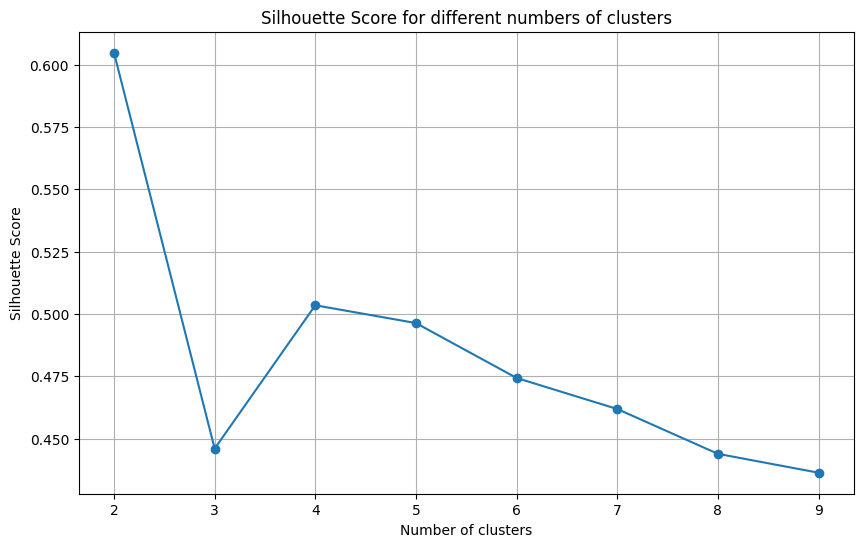

In [74]:

from sklearn.cluster import Birch

from sklearn.cluster import AgglomerativeClustering
silhouette_scores = []
cluster_range = range(2, 10)  # Ubah range ini sesuai kebutuhan Anda

for n_clusters in cluster_range:
    birch = Birch(n_clusters=n_clusters)
    cluster_labels =birch.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# 4. Plot Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for different numbers of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [75]:
# 3. Perform Agglomerative Clustering
n_clusters = 2  
birch = Birch(n_clusters=n_clusters)
cluster_labels = birch.fit_predict(df_scaled)

# 4. Calculate Evaluation Metrics
silhouette_avg = silhouette_score(df_scaled, cluster_labels)
davies_bouldin_avg = davies_bouldin_score(df_scaled, cluster_labels)
calinski_harabasz_avg = calinski_harabasz_score(df_scaled, cluster_labels)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')
print(f'Calinski-Harabasz Index: {calinski_harabasz_avg}')

# 5. Add cluster labels to the original DataFrame (optional)
df['Cluster'] = cluster_labels
df

Silhouette Score: 0.6048256505600489
Davies-Bouldin Index: 0.28468409522939386
Calinski-Harabasz Index: 8.377678105674864


,Migas,Industri Pengolahan,Pertanian,Pertambangan,Cluster
Provinsi,,,,,
Aceh,0.0,163.1,104.0,478.7,0
North Sumatra,1.1,12135.9,579.9,0.0,0
South Sumatra,436.0,3706.2,59.5,3381.6,0
West Sumatra,0.0,2756.6,100.4,11.4,0
Bengkulu,0.0,44.0,5.4,261.8,0
Riau,1528.5,20736.4,260.9,70.1,0
Riau Islands,2826.1,15204.5,122.0,64.1,0
Jambi,1450.6,853.2,252.2,445.9,0
Lampung,0.0,3699.4,648.6,1253.1,0


### K Medians

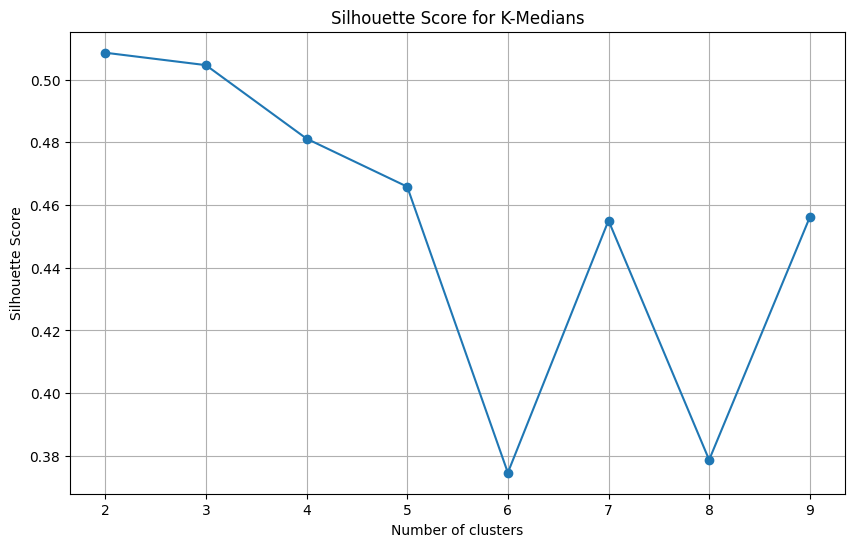

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler

# Asumsikan df adalah DataFrame yang berisi data Anda
df_scaled = StandardScaler().fit_transform(df)

silhouette_scores = []
cluster_range = range(2, 10)  # Ubah range ini sesuai kebutuhan Anda

for n_clusters in cluster_range:
    k_medians = KMedoids(n_clusters=n_clusters, method='alternate', init='k-medoids++')
    cluster_labels = k_medians.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for K-Medians')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Asumsikan df adalah DataFrame yang berisi data Anda
# Jika data berasal dari file CSV
# df = pd.read_csv('data.csv')

# Contoh data untuk pengujian
# df = pd.DataFrame({
#     'Feature1': np.random.rand(100),
#     'Feature2': np.random.rand(100)
# })

# 1. Skalasi data
df_scaled = StandardScaler().fit_transform(df)

# 2. Lakukan K-Medians Clustering
n_clusters = 2  # Menggunakan 2 cluster
k_medians = KMedoids(n_clusters=n_clusters, method='alternate', init='k-medoids++')
cluster_labels = k_medians.fit_predict(df_scaled)

# 3. Hitung Metrik Evaluasi
silhouette_avg = silhouette_score(df_scaled, cluster_labels)
davies_bouldin_avg = davies_bouldin_score(df_scaled, cluster_labels)
calinski_harabasz_avg = calinski_harabasz_score(df_scaled, cluster_labels)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')
print(f'Calinski-Harabasz Index: {calinski_harabasz_avg}')

# 4. Tambahkan label cluster ke DataFrame asli (opsional)
df['Cluster'] = cluster_labels


Silhouette Score: 0.508562676802824
Davies-Bouldin Index: 1.0891126913029856
Calinski-Harabasz Index: 14.760426708203326
